# Exploratory Data Analysis

## 1. 데이터 구성

•Pregnancies : 임신 횟수

•Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

•BloodPressure : 이완기 혈압 (mm Hg)

•SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

•Insulin : 2시간 혈청 인슐린 (mu U / ml)

•BMI : 체질량 지수 (체중kg / 키(m)^2)

•DiabetesPedigreeFunction : 당뇨병 혈통 기능

•Age : 나이

•Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0

## 2. 라이브러리 로드

In [4]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. 데이터 로드

In [112]:
df = pd.read_csv("data/diabetes.csv")

In [6]:
# 상위 5개 보기
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# info로 데이터 타입, 결측치, 메모리 사용량 등 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# 결측치 보기- TRUE/False로 표시됨
df_null = df.isnull()
df_null

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
#True = 1/False = 0 이므로, 더하면 결측치의 수를 알 수 있음
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 4. 결측치 시각화

In [9]:
# 수치데이터에 대한 요약 - 최소가 0인 값들은 결측치일 가능성이 있음..(인슐린,혈압 등), 제거해주기
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#가장 마지막에 있는 outcome은 lable값이라서 제외하고 학습과 예측에 사용할 컬럼을 만들어 줌
#feature_columns라는 변수에 담아줌
feature_columns = df.columns[:].tolist()

In [15]:
cols = feature_columns[1:]

In [17]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [23]:
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

<AxesSubplot:>

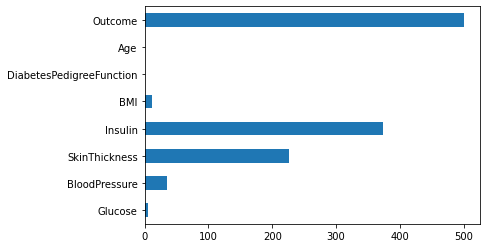

In [25]:
#결측치 개수를 구해 막대 그래프 시각화
df_null.sum().plot.barh()

<AxesSubplot:>

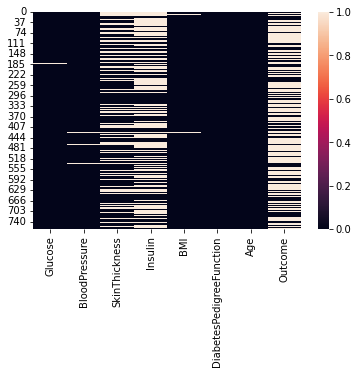

In [26]:
# 결측치를 heatmap으로 시각화
sns.heatmap(df_null)

## 5. 정답값
target, label이라고 부르기도 함

In [27]:
#정답값인 outcome의 개수
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
df["Outcome"].value_counts(normalize=True)
# 발병 비율이 34%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [40]:
# 다른 변수와 발병률을 비교해 보고 싶을 때
# 임신횟수와 비교
df_po = df.groupby(['Pregnancies'])["Outcome"].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

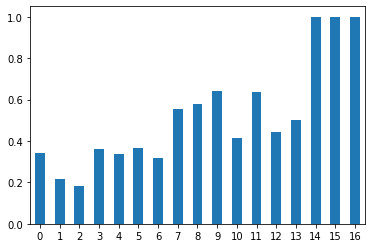

In [45]:
df_po["mean"].plot.bar(rot=0)

# 6. Countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

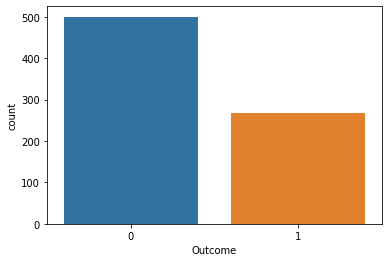

In [46]:
# 위에서 구했던 당뇨별 발병 비율 구하기
# 발병 빈도수 비교
sns.countplot(data=df,x='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

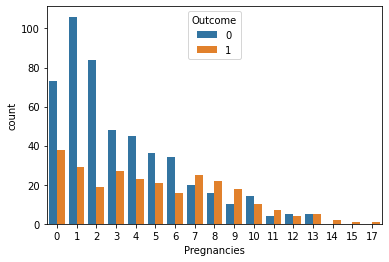

In [49]:
# 임신횟수에 따른 발병 빈도수
sns.countplot(data=df,x="Pregnancies",hue="Outcome")

In [52]:
# 임신 횟수의 많고 적음에 따라 변수 만들기 - 범주화
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies","Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

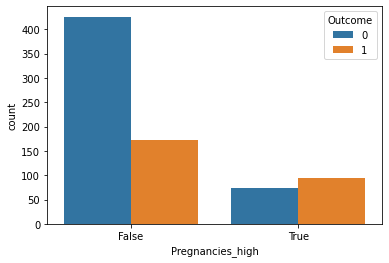

In [53]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고 다른 색으로 표시
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

In [54]:
# 연속된 수치 데이터를 범주화해서 표현하는것 --> 워나딩코디..?

# 7. Barplot
기본 설정으로 시각화 하면 y축에는 평균을 추정해서 그리게 됨

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

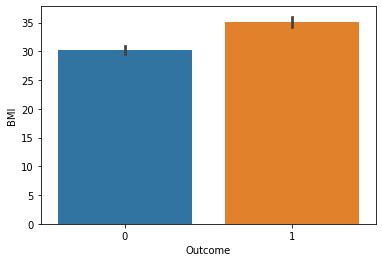

In [55]:
# 당뇨병 발병에 따른 BMI수치 비교
sns.barplot(data=df, x="Outcome",y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

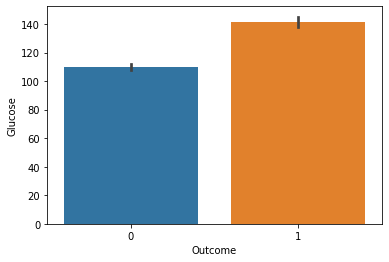

In [56]:
# 당뇨병 발병에 따른 포도당 수치 비교
sns.barplot(data=df, x="Outcome",y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

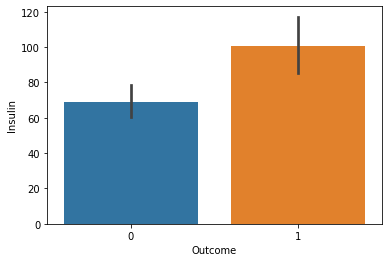

In [57]:
# 인슐린 수치가 0 이상인 관측치에 따른 당뇨병 발병 비교
sns.barplot(data=df, x="Outcome",y="Insulin")

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

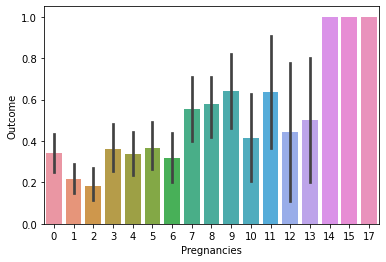

In [58]:
# 임신횟수에 대해서 당뇨병 발병 비율

sns.barplot(data=df, x="Pregnancies",y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

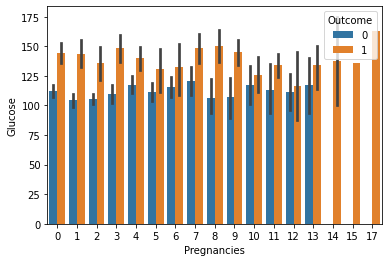

In [60]:
# 임신횟수에 따른 포도당 수치를 당뇨별 발병 여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

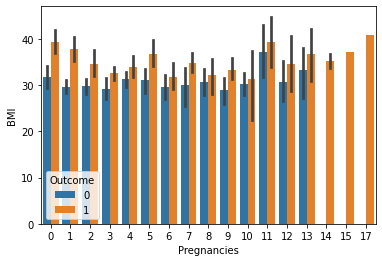

In [61]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

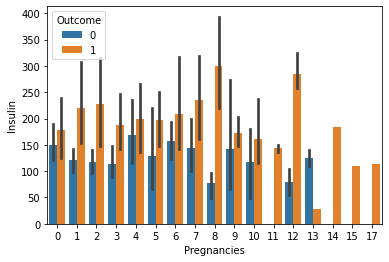

In [65]:
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

# 8. Boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

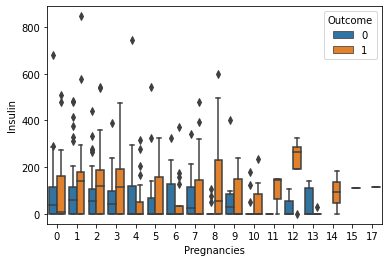

In [63]:
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")
# 박스플롯이 주저 앉아 있는 이유는 0인 값이 많아서

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

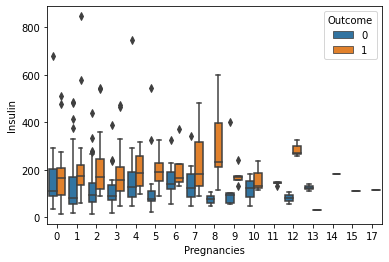

In [64]:
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

# 9. Violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

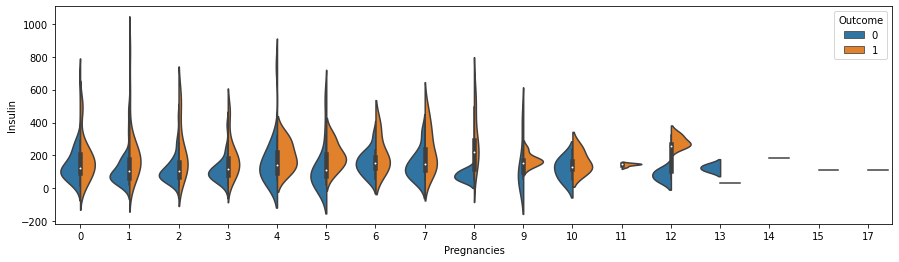

In [67]:
# 위 그래프를 violin plot으로 시각화
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"] > 0],
x="Pregnancies", y="Insulin", hue="Outcome", split=True)

# 9. swarmplot
산점도 분포를 그리는데 적합

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

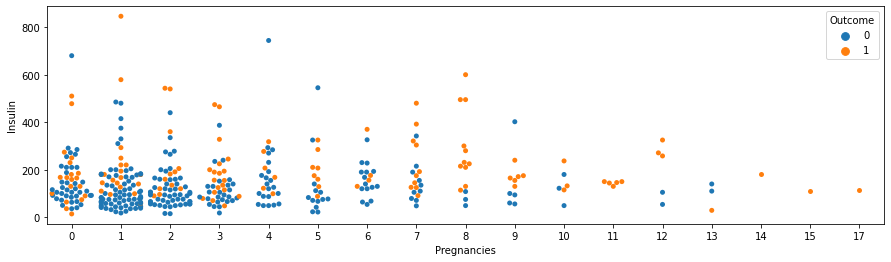

In [69]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"] > 0],
x="Pregnancies", y="Insulin", hue="Outcome")

# 11. Distplot
한개의 수치형 변수를 표현할 때 사용
히스토그램 + 밀도추정곡선

이 그래프를 통해 countplot의 범주 설정 가능


In [75]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

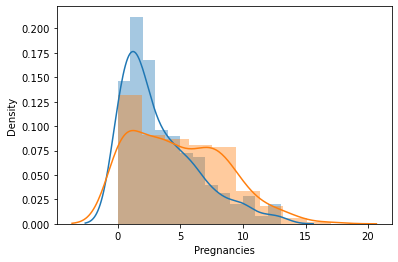

In [76]:
# 임신횟수에 따흔 당뇨병 발병 여부 시각화
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

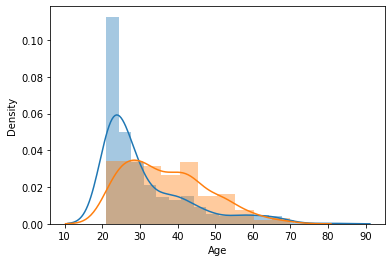

In [81]:
# 나이에 따른 당뇨병 발병 여부
sns.distplot(df_0["Age"],label=0)
sns.distplot(df_1["Age"],label=1)

# 12. Subplot


## pandas를 통한 histplot 그리기


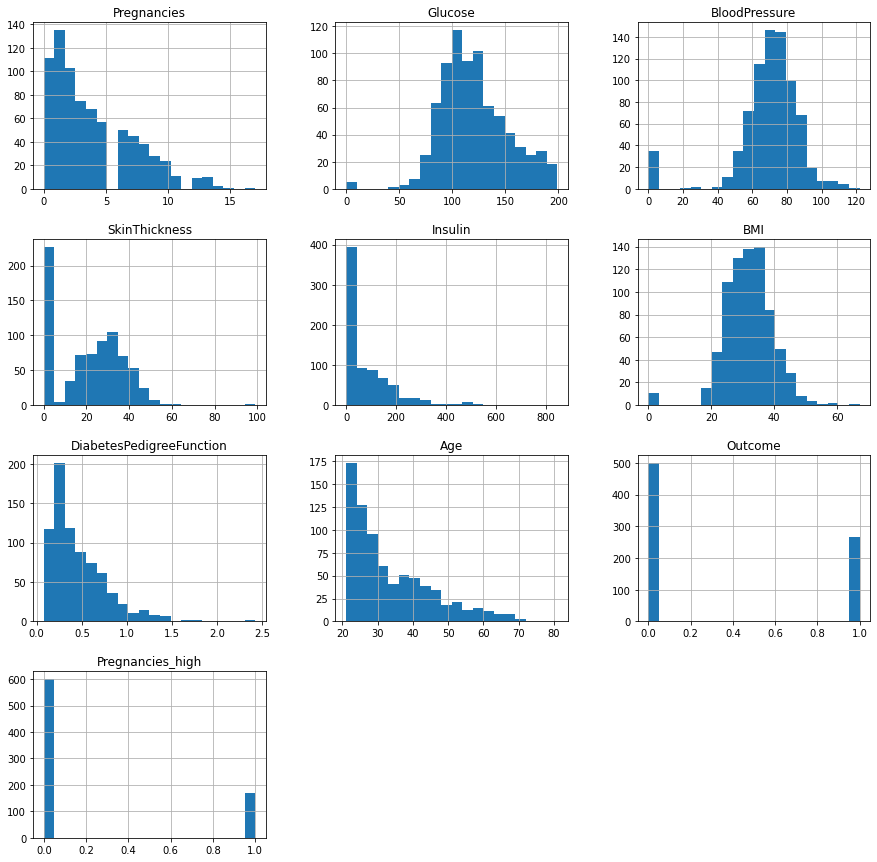

In [86]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15,15),bins=20)

## 반복문을 통한 서브플롯 그리기

In [101]:
col_num = df.columns[:-1].tolist()
col_num

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

3 SkinThickness 1 0
4 Insulin 1 1


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

8 Outcome 2 2


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


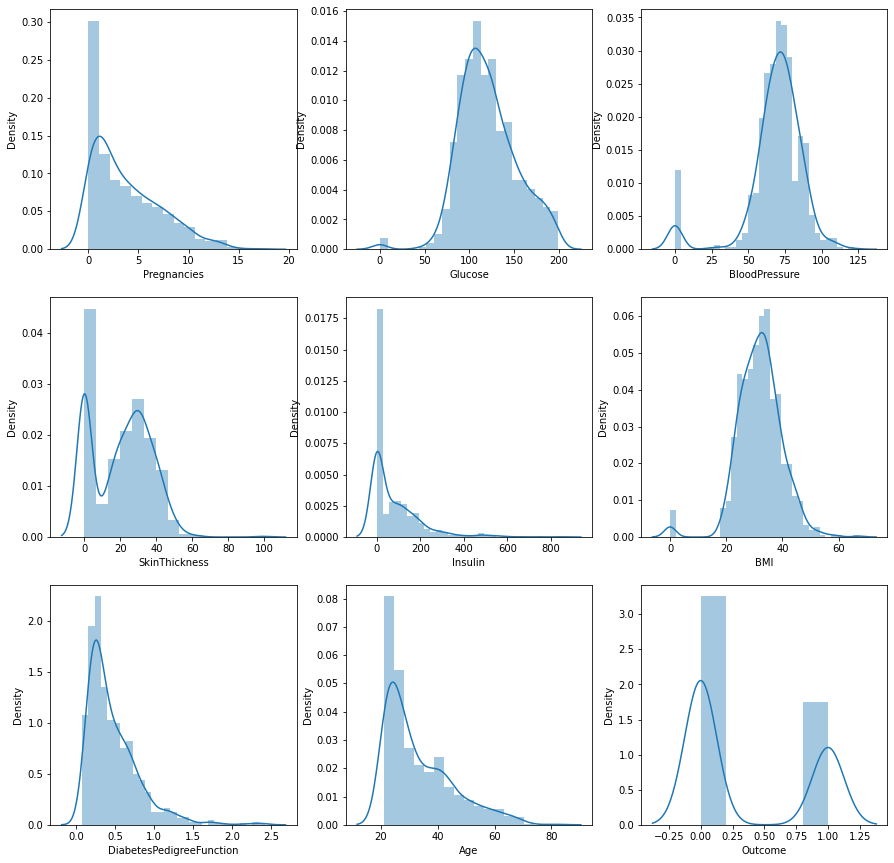

In [97]:
# distplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i,col_name in enumerate(col_num):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

0 Pregnancies 0 0
1 Glucose 0 1


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

2 BloodPressure 1 0
3 SkinThickness 1 1
4 Insulin 2 

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

5 BMI 2 1


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6 DiabetesPedigreeFunction 3 0
7 Age 3 1


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

8 Outcome 4 0


IndexError: index 4 is out of bounds for axis 0 with size 4

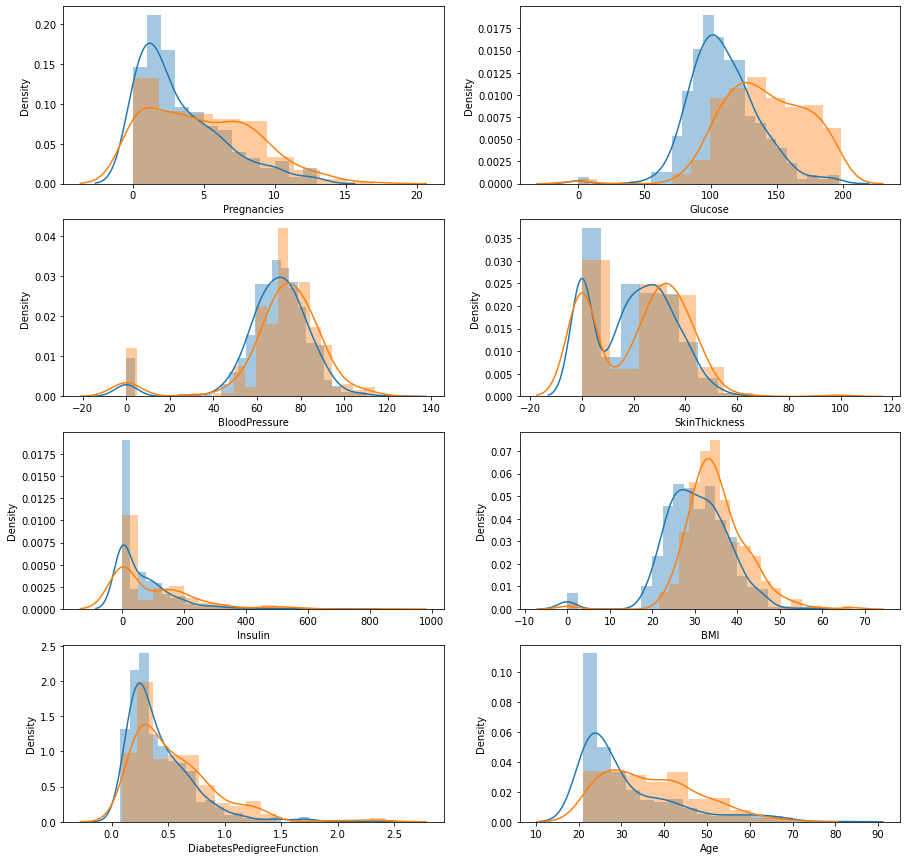

In [102]:
# distplot으로 서브플롯 그리기 - outcome 여부에 따라
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i,col_name in enumerate(col_num):
    row = i // 2
    col = i % 2
    print(i, col_name, row, col)
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

## violinplot

IndexError: index 4 is out of bounds for axis 0 with size 4

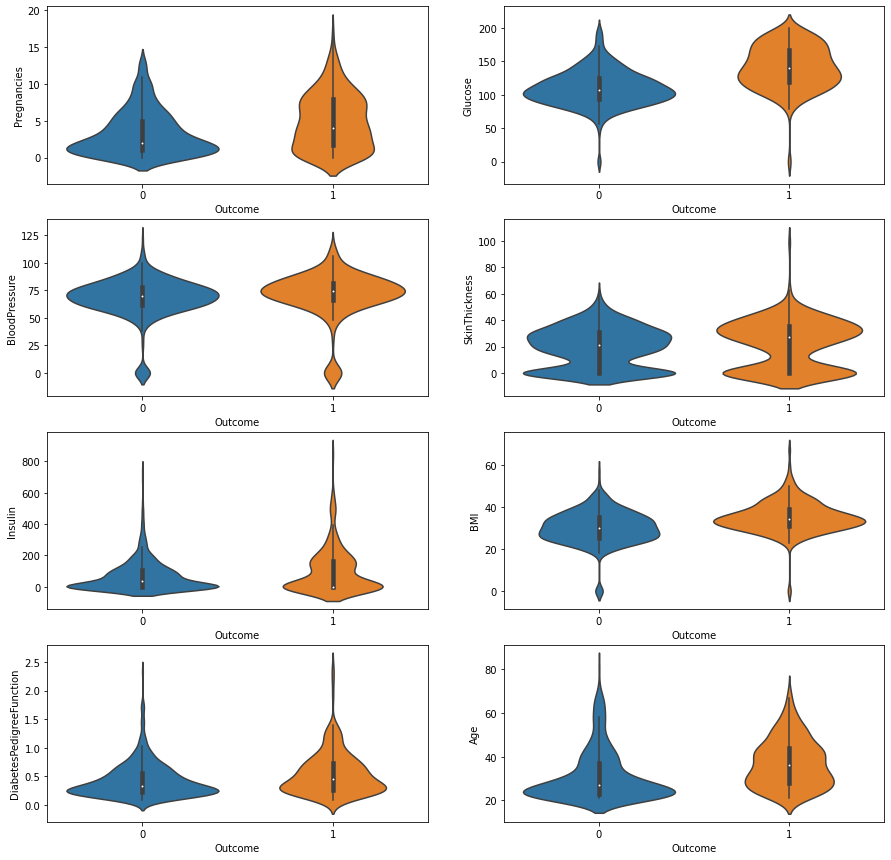

In [100]:
# violinplot으로 서브플롯 그리기 - outcome 여부에 따라
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i,col_name in enumerate(col_num):
    row = i // 2
    col = i % 2
    
    sns.violinplot(data=df, x="Outcome", y =col_name, ax=axes[row][col])
   

## lmplot
상관계수가 높은 두 변수에 대해 시각화

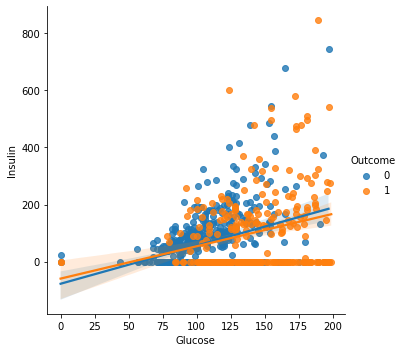

In [104]:
sns.lmplot(data=df, x='Glucose', y="Insulin", hue='Outcome')

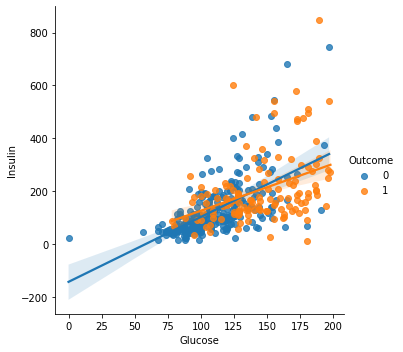

In [105]:
sns.lmplot(data=df[df["Insulin"] > 0], x='Glucose', y="Insulin", hue='Outcome')

## Pairplot

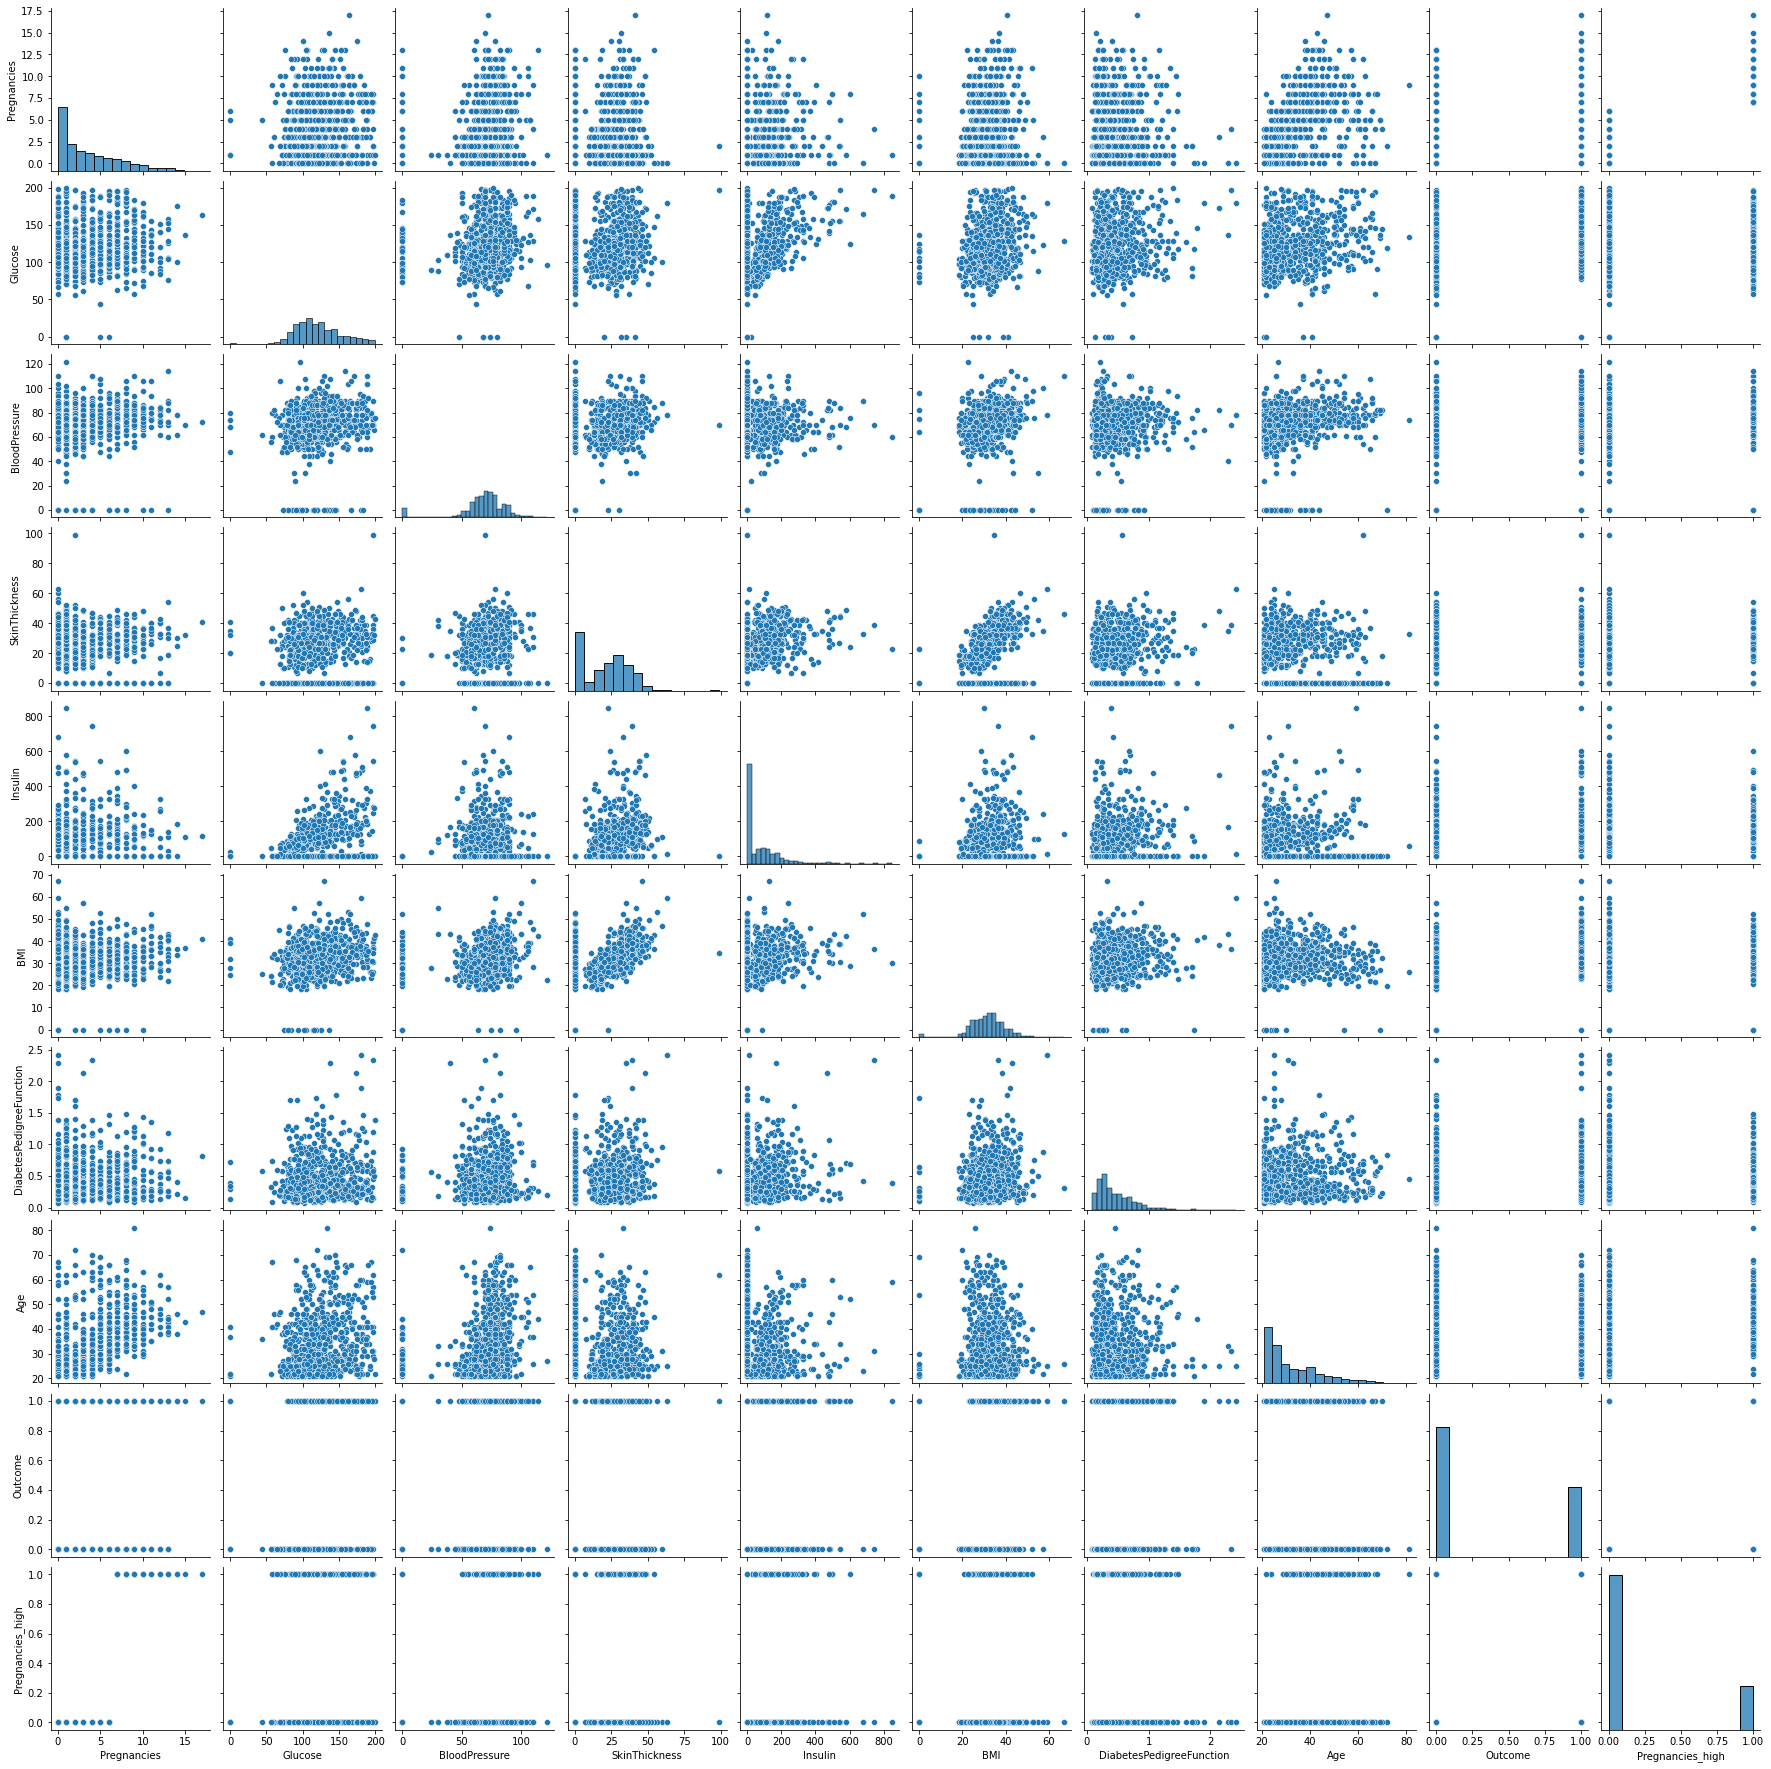

In [106]:
# 페어 플랏을 통해 모든 변수에 대해 아웃컴에 따른 Scatterplot 출력
sns.pairplot(df)
sns.PairGrid(df, hue="Outcome")

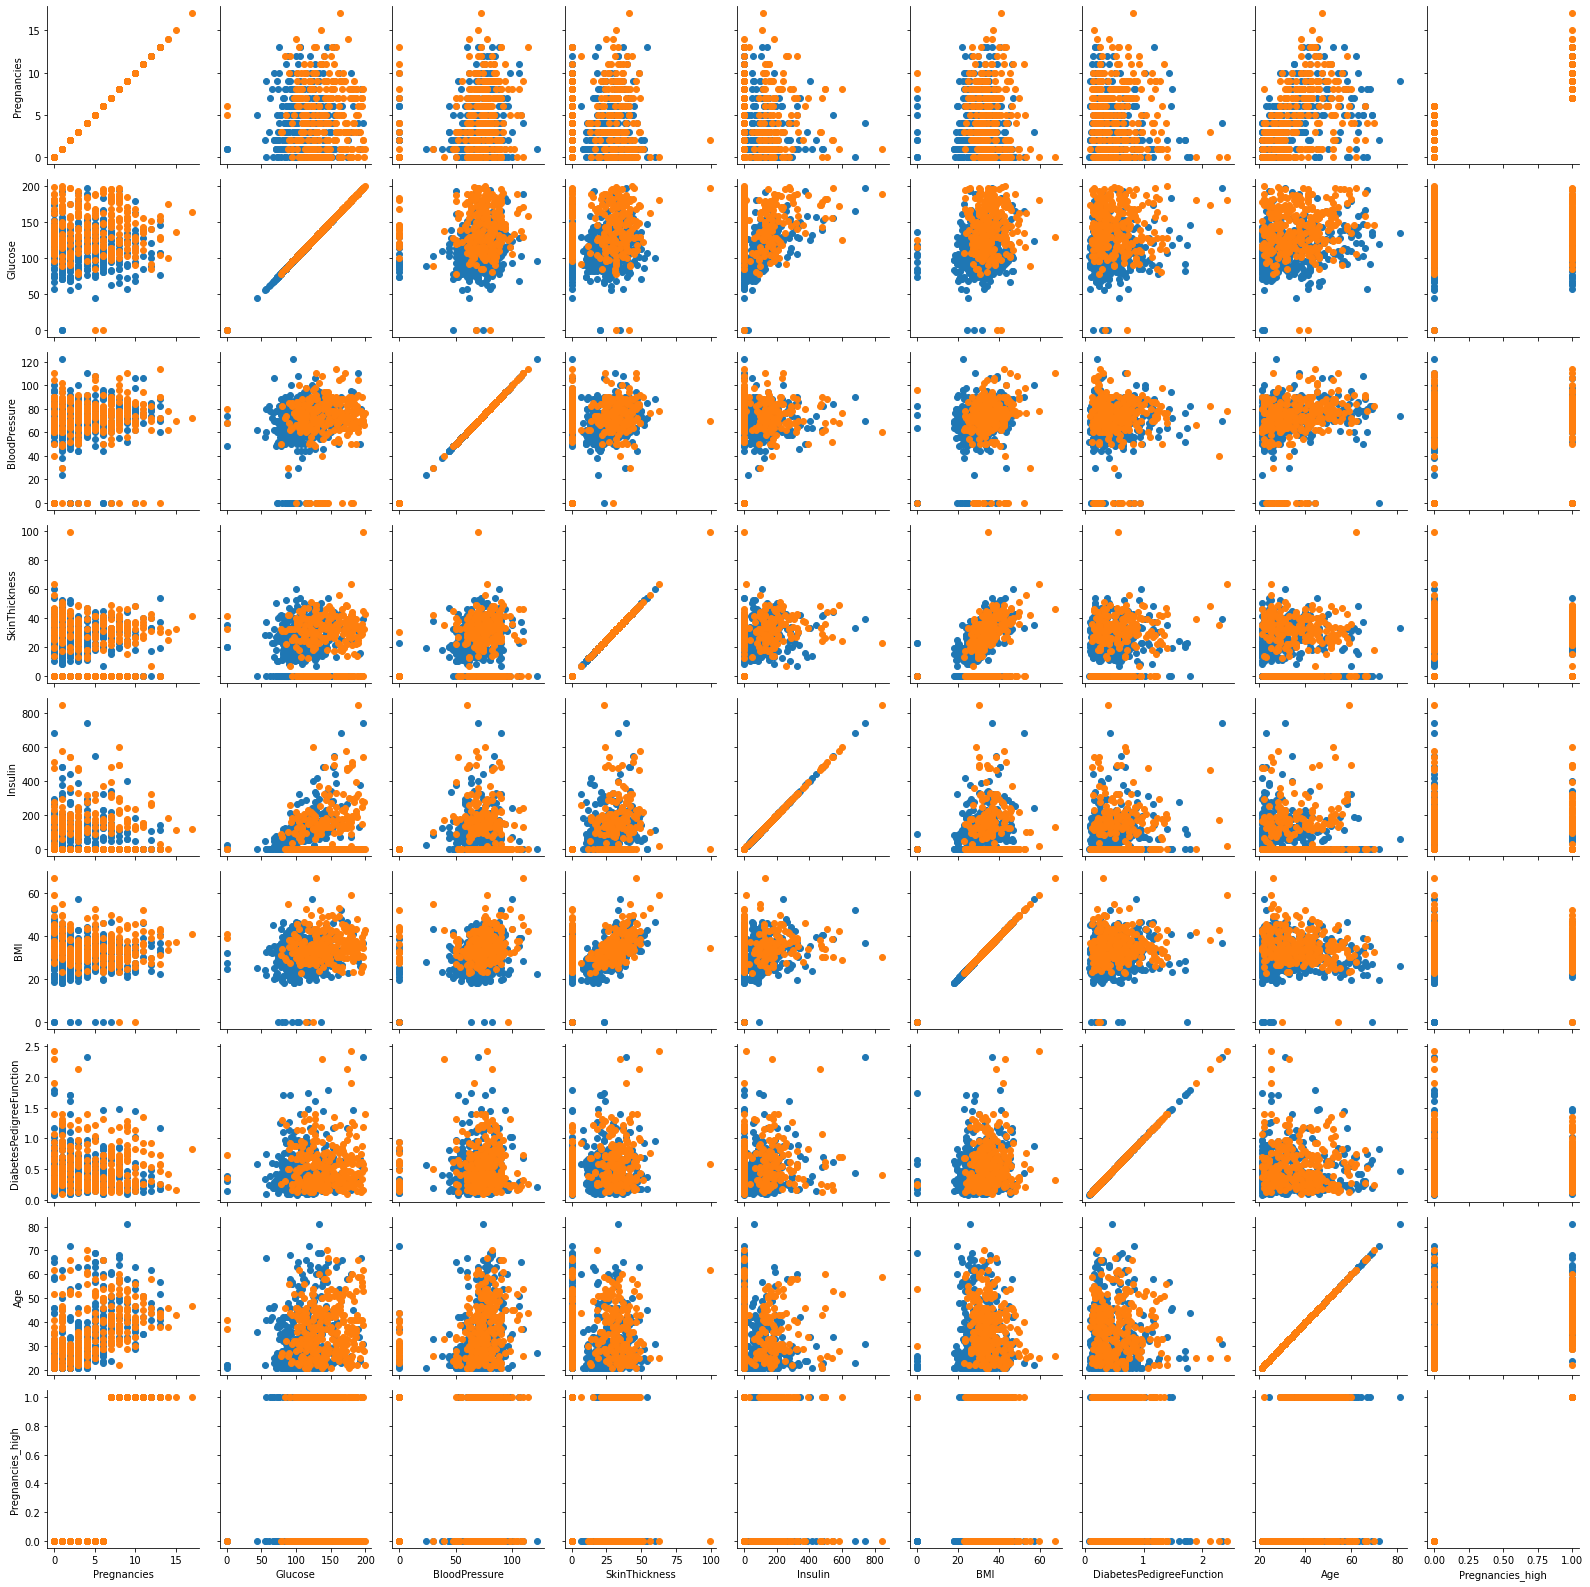

In [107]:
# 페어 그리드 사용
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

# 13. 상관분석
상관계수 r은 두 변수간의 연관된 정도를 나타낼 뿐 인과 관계를 설명하는 것은 아님

r이 -1과 -0.7 사이이면 강한 음의 상관 관계

r이 -0.7과 -0.3 사이이면 뚜렷한 음의 상관 관계

r이 -0.3과 -0.1 사이이면 약한 음의 상관 관계

r이 -0.1과 +0.1 사이이면 거의 무시될 수 있는 선형관계

r이 +0.1과 +0.3 사이이면 약한 양의 상관 관계

r이 +0.3과 +0.7 사이이면 뚜렷한 양의 상관 관계

r이 +0.7과 +1 사이이면 강한 양의 상관 관계


In [121]:
df_matrix = df.iloc[:,:-1].replace(0,np.nan)
df_matrix["Outcome"] = df["Outcome"]

In [122]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

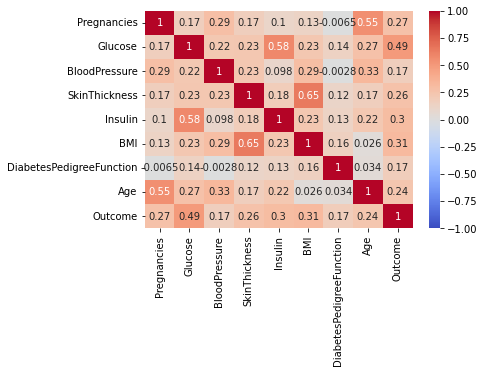

In [123]:
# heatmap으로 시각화
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="coolwarm", annot=True)

In [124]:
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관관계가 높은 변수들끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

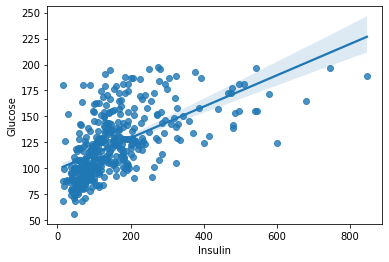

In [125]:
sns.regplot(data=df_matrix, x= "Insulin",y="Glucose")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

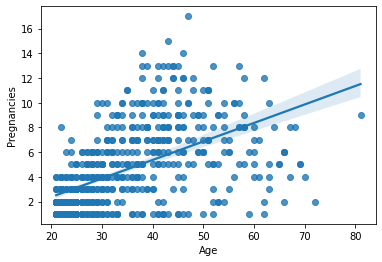

In [126]:
sns.regplot(data=df_matrix, x= "Age",y="Pregnancies")

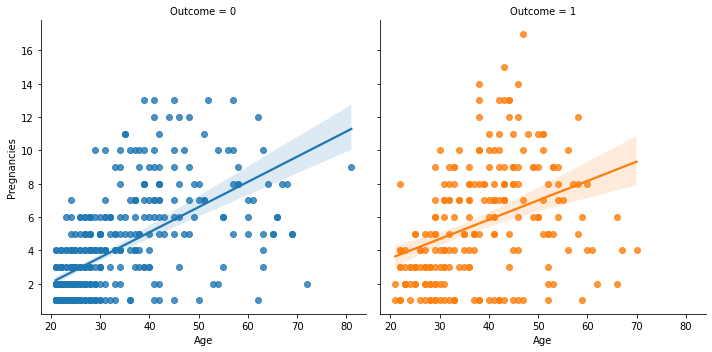

In [129]:
sns.lmplot(data=df_matrix, x= "Age",y="Pregnancies",hue="Outcome", col="Outcome")